First few rows of the dataset:
   Age  Gender Alcohol_consumption High_calories_foodconsumption_frequency  \
0   21  Female                  no                                      no   
1   21  Female           Sometimes                                      no   
2   23    Male          Frequently                                      no   
3   27    Male          Frequently                                      no   
4   22    Male           Sometimes                                      no   

   Vegetable_consumption_frequency  Avg_no_of_meals  \
0                              2.0              3.0   
1                              3.0              3.0   
2                              2.0              3.0   
3                              3.0              3.0   
4                              2.0              1.0   

  Calorie_consumption_monitoring Smoking_habits  Water_consumption  \
0                             no             no                2.0   
1                            

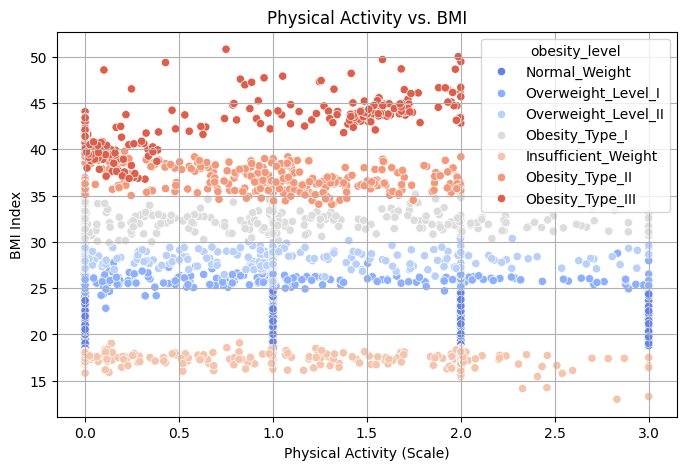

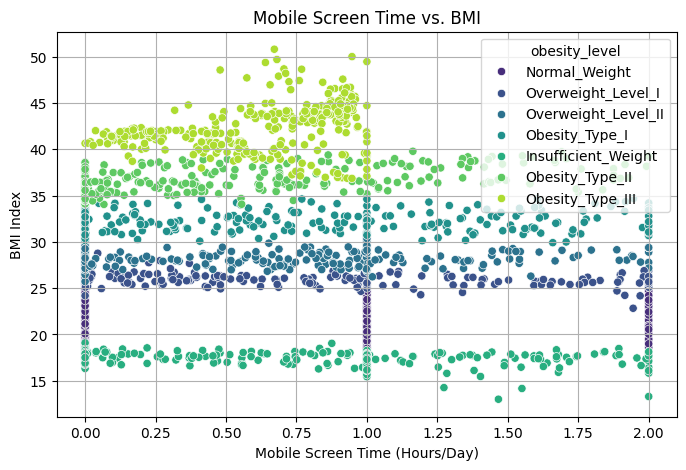


Correlation Matrix:
                   Physical_activity  Mobile_screentime  Bmi_index  \
Physical_activity           1.000000           0.058716  -0.183018   
Mobile_screentime           0.058716           1.000000  -0.104730   
Bmi_index                  -0.183018          -0.104730   1.000000   
obesity_numeric            -0.183010          -0.061423   0.966172   

                   obesity_numeric  
Physical_activity        -0.183010  
Mobile_screentime        -0.061423  
Bmi_index                 0.966172  
obesity_numeric           1.000000  


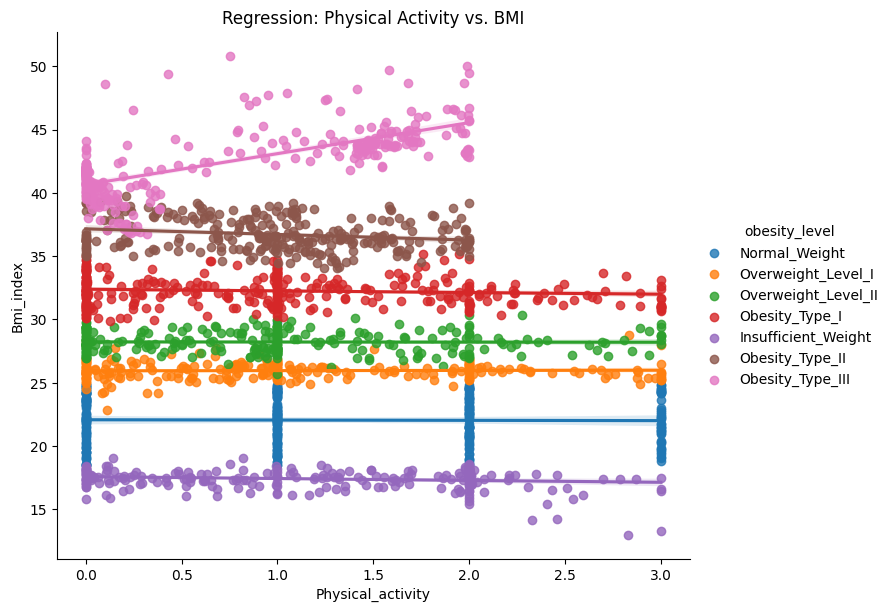

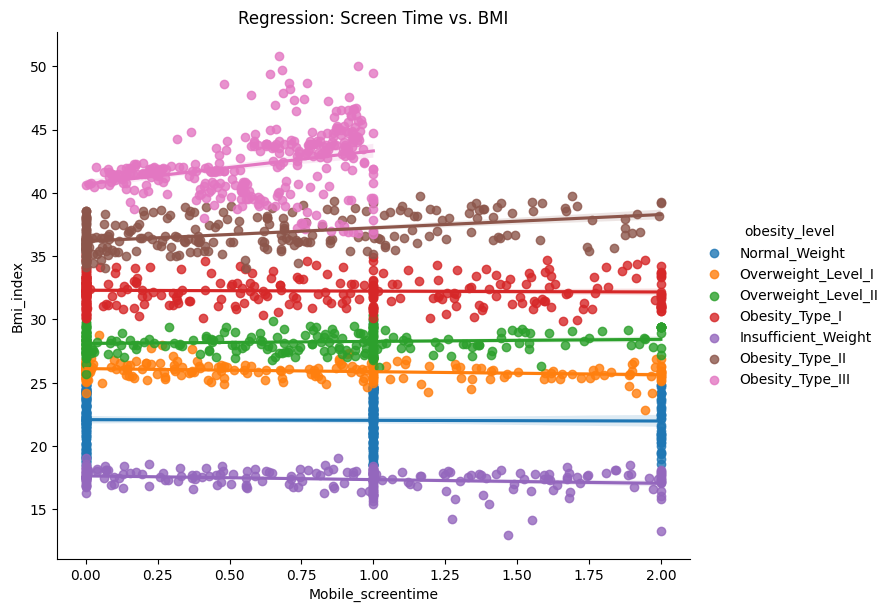

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("obesity_final1.csv")

print("First few rows of the dataset:")
print(df.head())

obesity_map = {
    "Underweight": 0,
    "Normal_Weight": 1,
    "Overweight_Level_I": 2,
    "Overweight_Level_II": 3,
    "Obesity_Type_I": 4,
    "Obesity_Type_II": 5,
    "Obesity_Type_III": 6
}
df['obesity_numeric'] = df['obesity_level'].map(obesity_map)

print("\nMissing values in the dataset:")
print(df.isnull().sum())

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Physical_activity', y='Bmi_index', hue='obesity_level', palette='coolwarm')
plt.title("Physical Activity vs. BMI")
plt.xlabel("Physical Activity (Scale)")
plt.ylabel("BMI Index")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Mobile_screentime', y='Bmi_index', hue='obesity_level', palette='viridis')
plt.title("Mobile Screen Time vs. BMI")
plt.xlabel("Mobile Screen Time (Hours/Day)")
plt.ylabel("BMI Index")
plt.grid(True)
plt.show()

correlation = df[['Physical_activity', 'Mobile_screentime', 'Bmi_index', 'obesity_numeric']].corr()
print("\nCorrelation Matrix:")
print(correlation)

sns.lmplot(data=df, x='Physical_activity', y='Bmi_index', hue='obesity_level', height=6, aspect=1.2)
plt.title("Regression: Physical Activity vs. BMI")
plt.show()

sns.lmplot(data=df, x='Mobile_screentime', y='Bmi_index', hue='obesity_level', height=6, aspect=1.2)
plt.title("Regression: Screen Time vs. BMI")
plt.show()


3rd question 

SVR Results:
R² Score: 0.8617534624596701


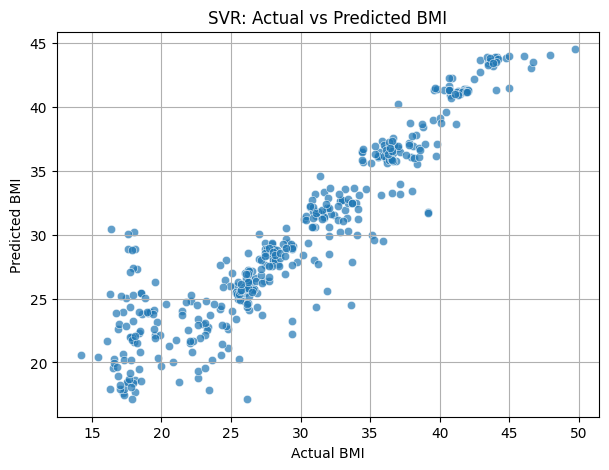

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


label_cols = df.select_dtypes(include=['object']).columns.tolist()
label_cols.remove('obesity_level')

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=['obesity_level', 'Bmi_index'])
y = df['Bmi_index']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

print("SVR Results:")
print("R² Score:", r2_score(y_test, y_pred))


plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("SVR: Actual vs Predicted BMI")
plt.grid(True)
plt.show()


Linear Regression:
R² Score: 0.6770693941252788
RMSE: 4.5992397304391375

Ridge Regression:
R² Score: 0.6771023403609009
RMSE: 4.599005111146177


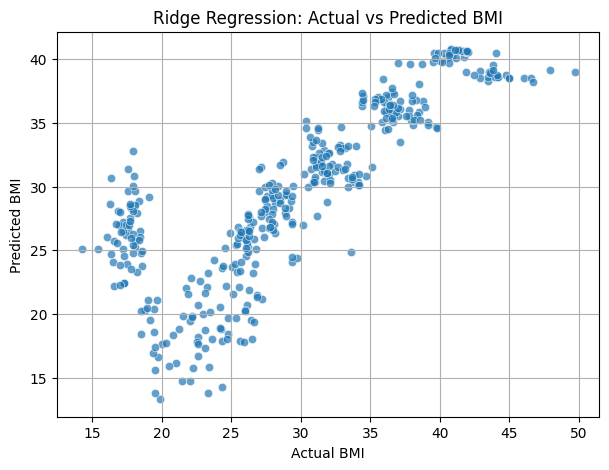

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Encode categorical variables
label_cols = df.select_dtypes(include=['object']).columns.tolist()
label_cols.remove('obesity_level')  # optional

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=['obesity_level', 'Bmi_index'])
y = df['Bmi_index']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Linear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

print("\nRidge Regression:")
print("R² Score:", r2_score(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.7)
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Ridge Regression: Actual vs Predicted BMI")
plt.grid(True)
plt.show()
